<a href="https://colab.research.google.com/github/rklartg/Google-Colaboratory/blob/main/Raquel_Adriana_Ortiz_Artiga_Tarea_de_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pylab as pylab

In [2]:
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

In [3]:
import math
import statsmodels.api as sm

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

**Descripcion de datos:**

Segun la documentacion del Dataset de McDonals este es el desempeño financiero de MCDonals generados de 1 año fiscal.

**Q1, Q2, Q3, Q4:** estas características representan los diferentes trimestres dentro de un año fiscal, a saber, Trimestre 1 (Q1), Trimestre 2 (Q2), Trimestre 3 (Q3) y Trimestre 4 (Q4).

## Cargar Datos

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv("/content/drive/MyDrive/Datos/Mcdonalds.csv")


In [10]:
data.head()

,Fiscal Year / Year,McDonald's Revenue,Growth Rate,Q1,Q2,Q3,Q4
0,1999,$13.3B,NaN,NaN,NaN,NaN,NaN
1,2000,$14.2B,7%?,NaN,NaN,NaN,NaN
2,2001,$14.9B,4%?,NaN,NaN,NaN,NaN
3,2002,$15.4B,4%?,NaN,NaN,NaN,$3.0B
4,2003,$17.1B,11%?,$3.8B,$4.3B,$4.5B,$4.6B


In [14]:
data.tail(10)

,Fiscal Year / Year,McDonald's Revenue,Growth Rate,Q1,Q2,Q3,Q4
14,2013,$28.1B,2%?,$6.6B,$7.1B,$7.3B,$7.1B
15,2014,$27.4B,-2%?,$6.7B,$7.2B,$7.0B,$6.6B
16,2015,$25.4B,-7%?,$6.0B,$6.5B,$6.6B,$6.3B
17,2016,$24.6B,-3%?,$5.9B,$6.3B,$6.4B,$6.0B
18,2017,$22.8B,-7%?,$5.7B,$6.0B,$5.8B,$5.3B
19,2018,$21.3B,-7%?,$5.1B,$5.4B,$5.4B,$5.4B
20,2019,$21.4B,1%?,$5.0B,$5.3B,$5.6B,$5.4B
21,2020,$19.2B,-10%?,$4.7B,$3.8B,$5.4B,$5.3B
22,2021,$23.2B,21%?,$5.1B,$5.9B,$6.2B,$6.0B
23,2022,$23.2B,-0%?,$5.7B,$5.7B,$5.9B,$5.9B


In [13]:
data.shape

(24, 7)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fiscal Year / Year  24 non-null     int64 
 1   McDonald's Revenue  24 non-null     object
 2   Growth Rate         23 non-null     object
 3   Q1                  20 non-null     object
 4   Q2                  20 non-null     object
 5   Q3                  20 non-null     object
 6   Q4                  21 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.4+ KB


In [22]:
data["McDonald's Revenue"]

0     $13.3B
1     $14.2B
2     $14.9B
3     $15.4B
4     $17.1B
5     $18.6B
6     $19.1B
7     $20.9B
8     $22.8B
9     $23.5B
10    $22.7B
11    $24.1B
12    $27.0B
13    $27.6B
14    $28.1B
15    $27.4B
16    $25.4B
17    $24.6B
18    $22.8B
19    $21.3B
20    $21.4B
21    $19.2B
22    $23.2B
23    $23.2B
Name: McDonald's Revenue, dtype: object

In [23]:
data.describe()

,Fiscal Year / Year
count,24.000000
mean,2010.500000
std,7.071068
min,1999.000000
25%,2004.750000
50%,2010.500000
75%,2016.250000
max,2022.000000


In [71]:
sales = data.copy()
sales.head()

,Fiscal Year / Year,McDonald's Revenue,Growth Rate,Q1,Q2,Q3,Q4
0,1999,$13.3B,NaN,NaN,NaN,NaN,NaN
1,2000,$14.2B,7%?,NaN,NaN,NaN,NaN
2,2001,$14.9B,4%?,NaN,NaN,NaN,NaN
3,2002,$15.4B,4%?,NaN,NaN,NaN,$3.0B
4,2003,$17.1B,11%?,$3.8B,$4.3B,$4.5B,$4.6B


In [72]:
print(sales['Fiscal Year / Year'].min(),'initial')
print(sales['Fiscal Year / Year'].max(),'final')

1999 initial
2022 final


In [90]:
sales.isnull().sum()

Fiscal Year / Year    0
McDonald's Revenue    0
Growth Rate           1
Q1                    4
Q2                    4
Q3                    4
Q4                    3
dtype: int64

<Axes: >

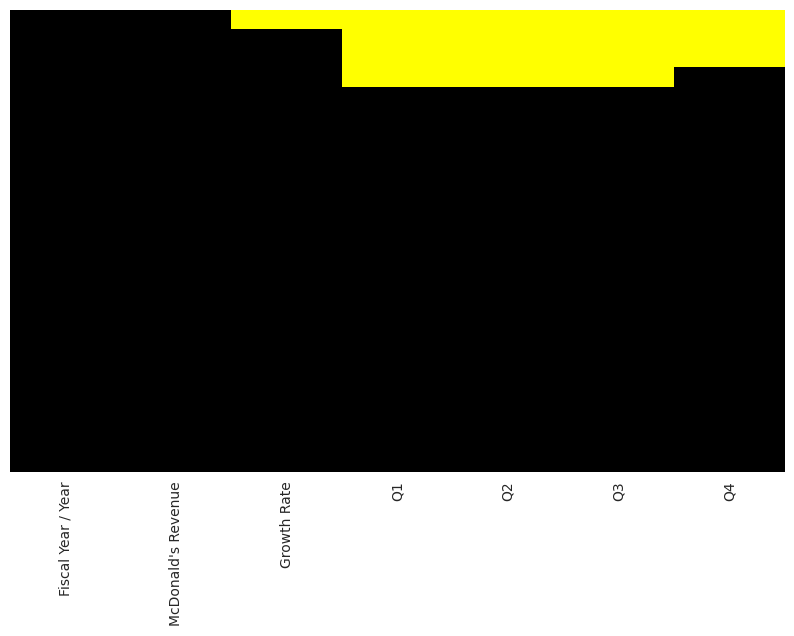

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(sales.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

In [73]:
sales['Growth Rate'].replace("?","") #No reemplaza el signo de interrogacion entonces realizare otra forma de reemplazo

0       NaN
1       7%?
2       4%?
3       4%?
4      11%?
5       8%?
6       3%?
7       9%?
8       9%?
9       3%?
10     -3%?
11      6%?
12     12%?
13      2%?
14      2%?
15     -2%?
16     -7%?
17     -3%?
18     -7%?
19     -7%?
20      1%?
21    -10%?
22     21%?
23     -0%?
Name: Growth Rate, dtype: object

In [76]:
#Como el replace me funcionaba asi, aproveche a borrar el signo de %
sales['Growth Rate'].replace(['7%?','4%?', '11%?','8%?','3%?','9%?','-3%?','6%?','12%?','2%?','-2%?','-7%?','1%?','-10%?','21%?','-0%?'],['7', '4','11','8','3','9','-3','6','12','2','-2','-7','1','-10','21','0'], inplace=True)

In [91]:
sales['Growth Rate']

0     NaN
1       7
2       4
3       4
4      11
5       8
6       3
7       9
8       9
9       3
10     -3
11      6
12     12
13      2
14      2
15     -2
16     -7
17     -3
18     -7
19     -7
20      1
21    -10
22     21
23      0
Name: Growth Rate, dtype: object

In [92]:
#Reemplazo los valores NaN con la media
sales['Growth Rate'].fillna(sales['Growth Rate'].median(), inplace=True)

In [93]:
sales['Growth Rate']

0     3.0
1       7
2       4
3       4
4      11
5       8
6       3
7       9
8       9
9       3
10     -3
11      6
12     12
13      2
14      2
15     -2
16     -7
17     -3
18     -7
19     -7
20      1
21    -10
22     21
23      0
Name: Growth Rate, dtype: object

In [97]:
sales['Growth Rate'] = sales['Growth Rate'].astype(np.int64)
sales['Growth Rate'].dtype

dtype('int64')

In [99]:
sales['Q1'].replace(['$3.8B','$4.4B','$4.8B','$4.9B','$5.3B','$5.6B','$5.1B','$5.6B','$6.1B','$6.5B','$6.6B','$6.7B','$6.0B','$5.9B','$5.7B','$5.1B','$5.0B','$4.7B','$5.1B','$5.7B'],['3800000','4400000','4800000','4900000','5300000','5600000','5100000','5600000','6100000','6500000','6600000','6700000','6000000','5900000','5700000','5100000','5000000','4700000','5100000','5700000'], inplace=True)

In [101]:
sales['Q1'].fillna(sales['Q1'].median(), inplace=True)

In [102]:
sales['Q1'] = sales['Q1'].astype(np.int64)
sales['Q1'].dtype

dtype('int64')

In [104]:
sales['Q2'].replace(['$4.3B','$4.7B','$5.1B','$5.4B','$5.8B','$6.1B','$5.6B','$5.9B','$6.9B','$6.9B','$7.1B','$7.2B','$6.5B','$6.3B','$6.0B','$5.4B','$5.3B','$3.8B','$5.9B','$5.7B'],['4300000','4700000','5100000','5400000','5800000','6100000','5600000','5900000','6900000','6900000','7100000','7200000','6500000','6300000','6000000','5400000','5300000','3800000','5900000','5700000'], inplace=True)

In [105]:
sales['Q2'].fillna(sales['Q2'].median(), inplace=True)

In [106]:
sales['Q2'] = sales['Q2'].astype(np.int64)
sales['Q2'].dtype

dtype('int64')

In [109]:
sales['Q3'].replace(['$4.5B','$4.9B','$5.3B','$5.5B','$5.9B','$6.3B','$6.0B','$6.3B','$7.2B','$7.2B','$7.3B','$7.0B','$6.6B','$6.4B','$5.8B','$5.4B','$5.6B','$5.4B','$6.2B','$5.9B'],['4500000','4900000','5300000','5500000','5900000','6300000','6000000','6300000','7200000','7200000','7300000','7000000','6600000','6400000','5800000','5400000','5600000','5400000','6200000','5900000'], inplace=True)

In [110]:
sales['Q3'].fillna(sales['Q3'].median(), inplace=True)

In [111]:
sales['Q3'] = sales['Q3'].astype(np.int64)
sales['Q3'].dtype

dtype('int64')

In [113]:
sales['Q4'].replace(['$3.0B','$4.6B','$4.5B','$3.9B','$5.1B','$5.8B','$5.6B','$6.0B','$6.2B','$6.8B','$7.0B','$7.1B','$6.6B','$6.3B','$6.0B','$5.3B','$5.4B','$5.4B','$5.3B','$6.0B','$5.9B'],['3000000','4600000','4500000','3900000','5100000','5800000','5600000','6000000','6200000','6800000','7000000','7100000','6600000','6300000','6000000','5300000','5400000','5400000','5300000','6000000','5900000'], inplace= True)

In [114]:
sales['Q4'].fillna(sales['Q4'].median(), inplace=True)

In [115]:
sales['Q4'] = sales['Q4'].astype(np.int64)
sales['Q4'].dtype

dtype('int64')

In [118]:
sales["McDonald's Revenue"].replace(['$13.3B','$14.2B','$14.9B','$15.4B','$17.1B','$18.6B','$19.1B','$20.9B','$22.8B','$23.5B','$22.7B','$24.1B','$27.0B','$27.6B','$28.1B','$27.4B','$25.4B','$24.6B','$22.8B','$21.3B','$21.4B','$19.2B','$23.2B','$23.2B'],['13300000','14200000','14900000','15400000','17100000','18600000','19100000','20900000','22800000','23500000','22700000','24100000','27000000','27600000','28100000','27400000','25400000','24600000','22800000','21300000','21400000','19200000','23200000','23200000'],inplace = True)

In [119]:
sales["McDonald's Revenue"] = sales["McDonald's Revenue"].astype(np.int64)
sales["McDonald's Revenue"].dtype

dtype('int64')

In [120]:
sales.head()

,Fiscal Year / Year,McDonald's Revenue,Growth Rate,Q1,Q2,Q3,Q4
0,1999,13300000,3,5450000,5850000,5950000,5800000
1,2000,14200000,7,5450000,5850000,5950000,5800000
2,2001,14900000,4,5450000,5850000,5950000,5800000
3,2002,15400000,4,5450000,5850000,5950000,3000000
4,2003,17100000,11,3800000,4300000,4500000,4600000


In [128]:
sales = sales.rename(columns={ 'Growth Rate': 'Growth Rate %' }) #Cambie el nombre de la columna para recordar que es porcentaje
sales = sales.rename(columns={ 'Fiscal Year / Year': 'Fiscal Year' }) #Cambie el nombre de la columna
sales = sales.rename(columns={ "McDonald's Revenue": 'Revenue' }) #Cambie el nombre de la columna

In [129]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Fiscal Year    24 non-null     int64
 1   Revenue        24 non-null     int64
 2   Growth Rate %  24 non-null     int64
 3   Q1             24 non-null     int64
 4   Q2             24 non-null     int64
 5   Q3             24 non-null     int64
 6   Q4             24 non-null     int64
dtypes: int64(7)
memory usage: 1.4 KB


<Axes: >

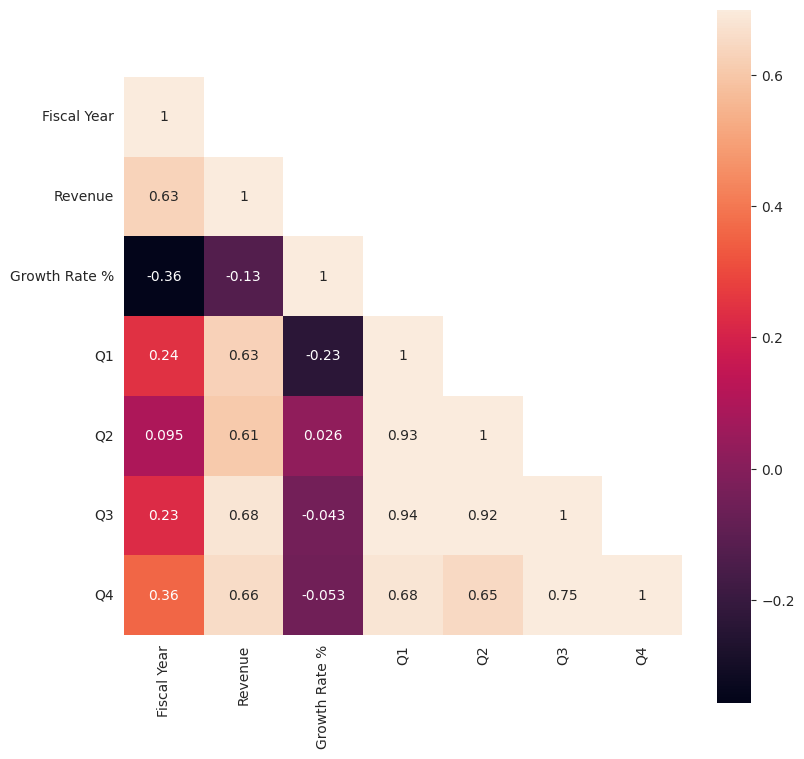

In [130]:
correlation_map = sales[sales.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

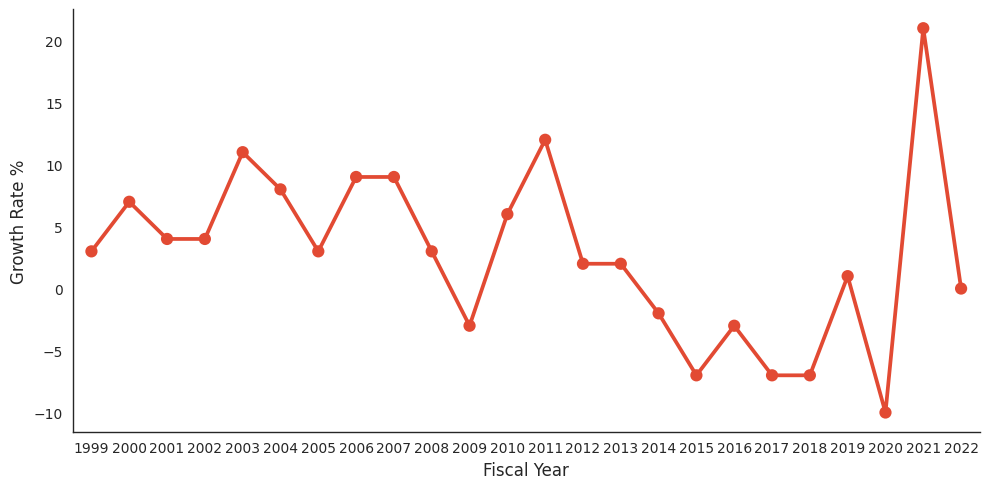

In [140]:
sns.catplot(x="Fiscal Year" ,y = "Growth Rate %" , data=sales, kind="point", aspect=2)

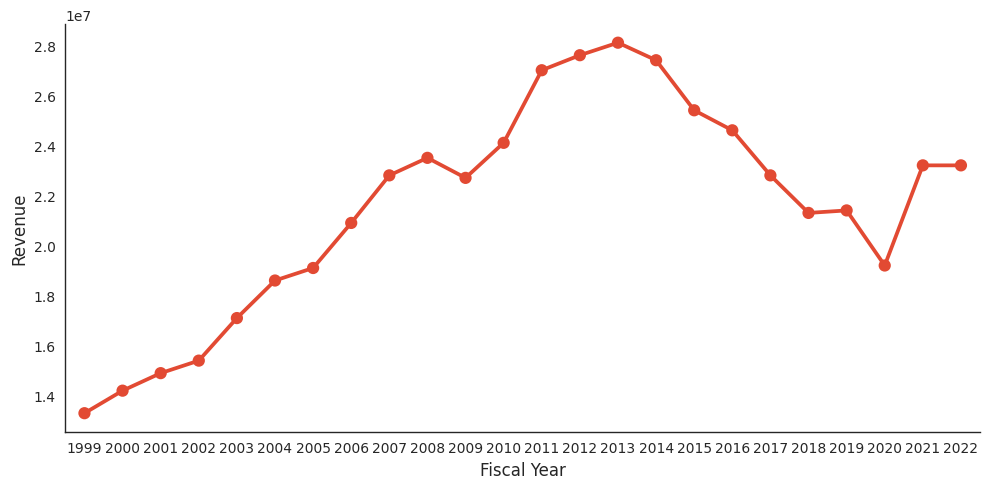

In [141]:
sns.catplot(x="Fiscal Year" ,y = "Revenue" , data=sales, kind="point", aspect=2)

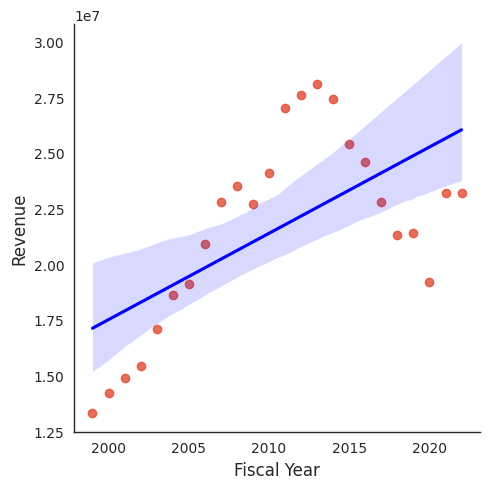

In [143]:
sns.lmplot(x= 'Fiscal Year' , y ='Revenue',data=sales, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

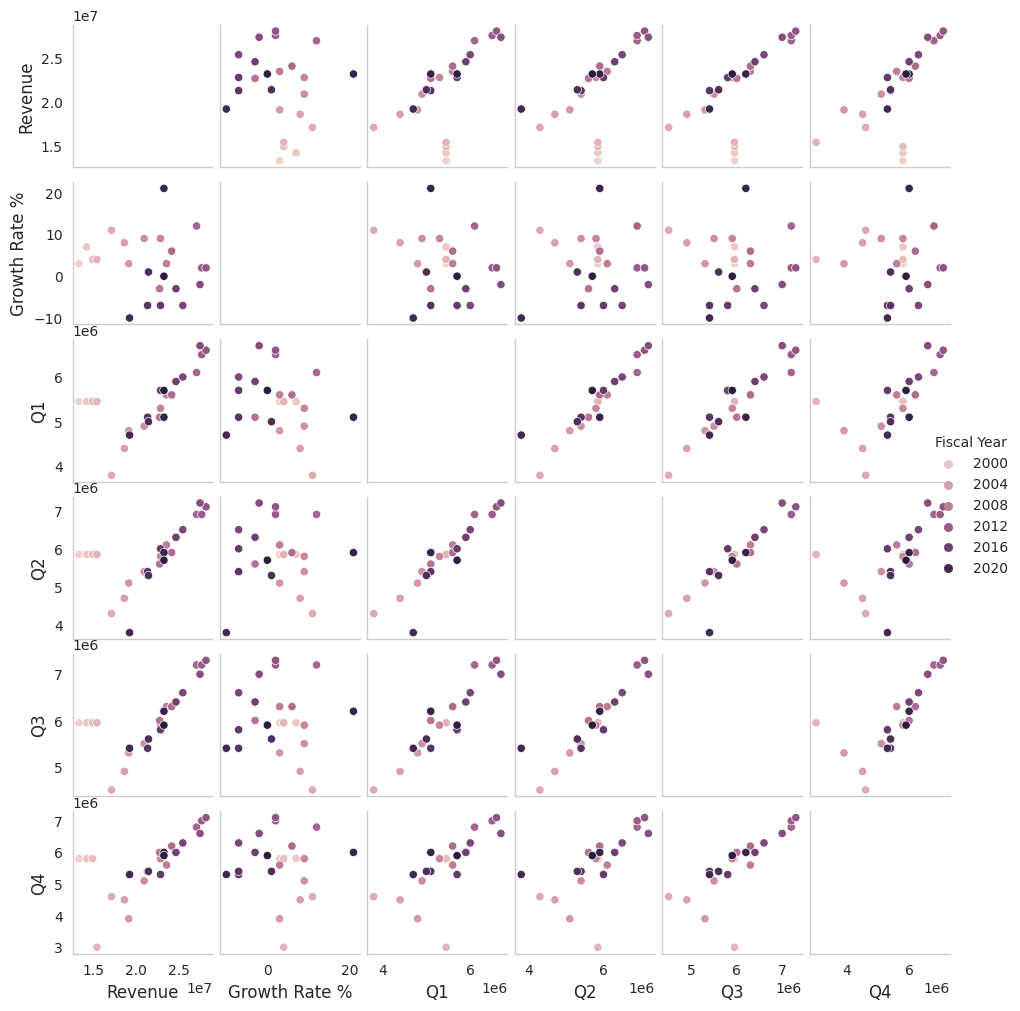

In [146]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(sales,hue='Fiscal Year')
pp.fig.set_size_inches(10,10);

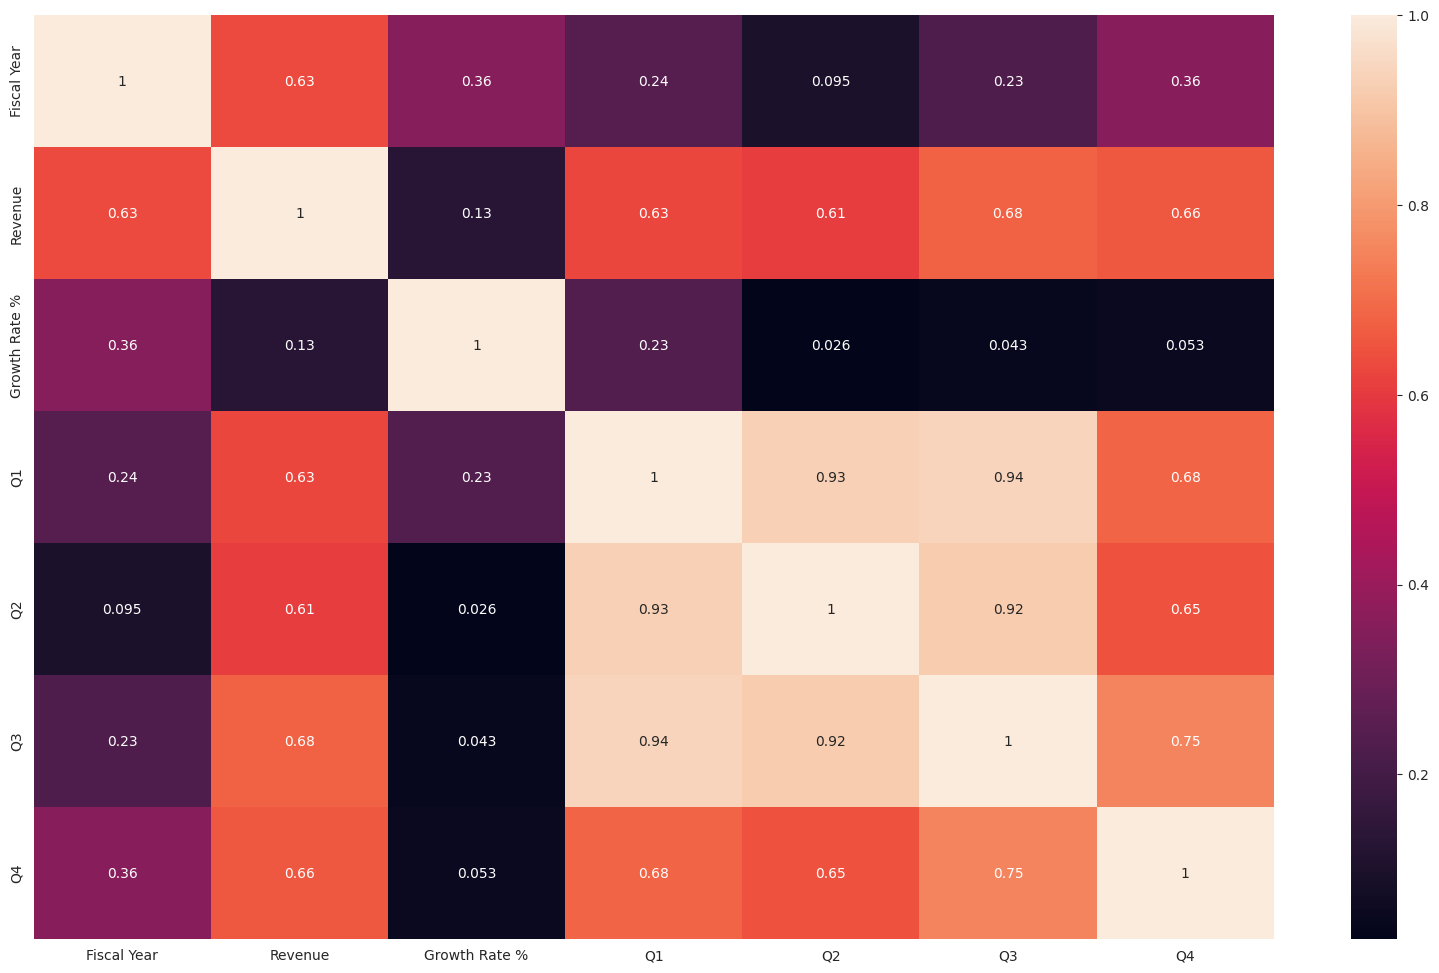

In [147]:
plt.subplots(figsize=(20,12))
sns.heatmap(sales.corr().abs(), annot=True)
plt.savefig("heatmap.png")

## Conclusiones de Exploración: Lo mas dificil de este dataset es la conversion de las valiables Q1, Q2, Q3, Q4, Revenue y el Grown Rate porque tuve dificultades para convertirlos a numericos.

<Axes: >

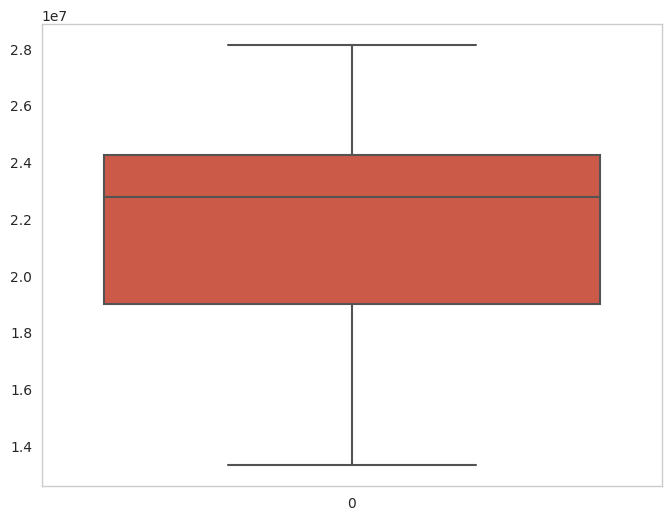

In [157]:
sns.boxplot(sales['Revenue'])

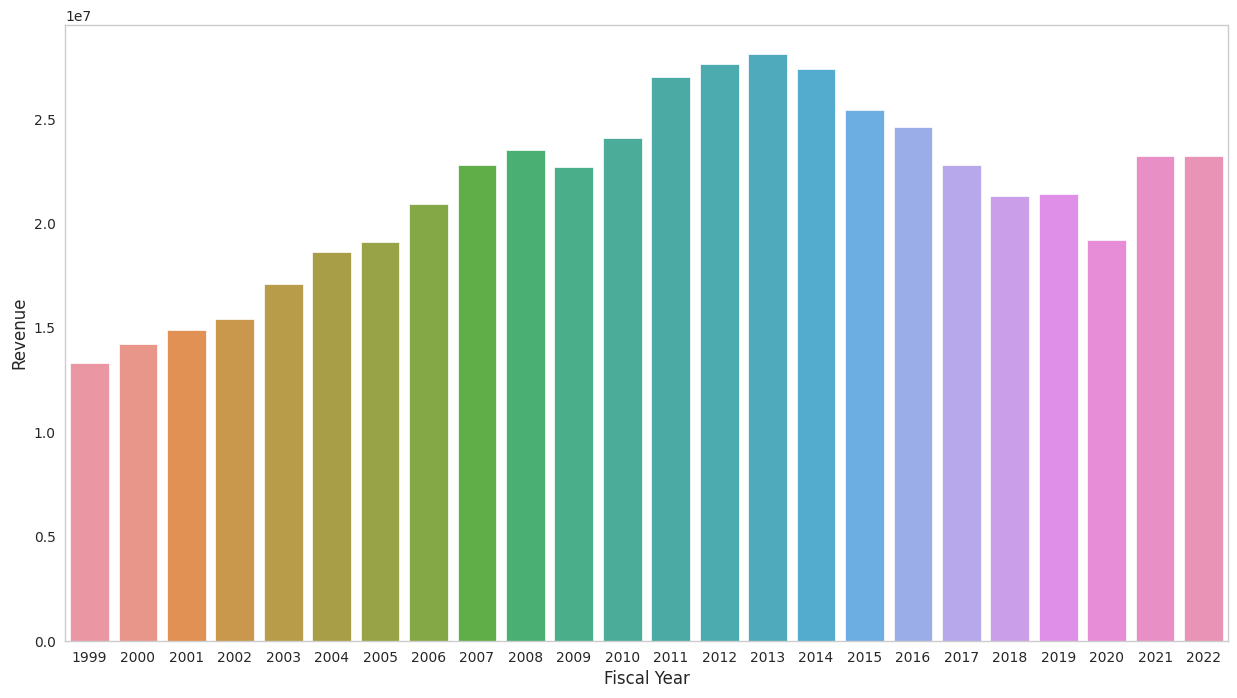

In [159]:
plt.figure(figsize=(15,8))
sns.barplot(x='Fiscal Year', y='Revenue' ,data=sales);

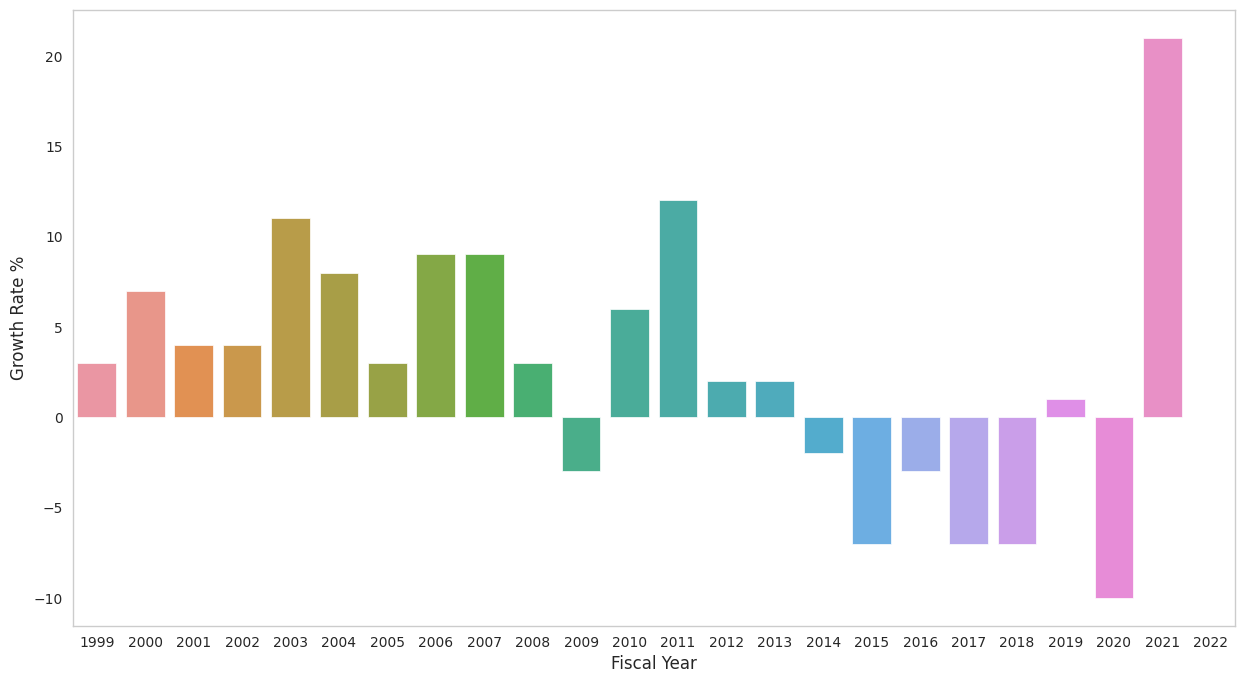

In [160]:
plt.figure(figsize=(15,8))
sns.barplot(x='Fiscal Year', y='Growth Rate %' ,data=sales);

In [172]:
X = sales.drop(['Fiscal Year','Revenue','Growth Rate %'] , axis = 1)
y= sales.Revenue

In [173]:
X.dtypes

Q1    int64
Q2    int64
Q3    int64
Q4    int64
dtype: object

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [175]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [177]:
regressor.intercept_

13709431.043224314

In [178]:
regressor.coef_

array([ -33134.7631032 , 2068965.35980832, 4415774.72001321,
       6007592.85910976])

In [179]:
y_pred_train = regressor.predict(X_train)

In [180]:
y_pred = regressor.predict(X_test)

In [181]:
mean_squared_error(y_test, y_pred)

8277191877086.436

In [182]:
math.sqrt(mean_squared_error(y_test, y_pred))

2877010.9275229448

In [183]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.4700218920604713

In [184]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.4847636238549512

In [185]:
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred})

In [186]:
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

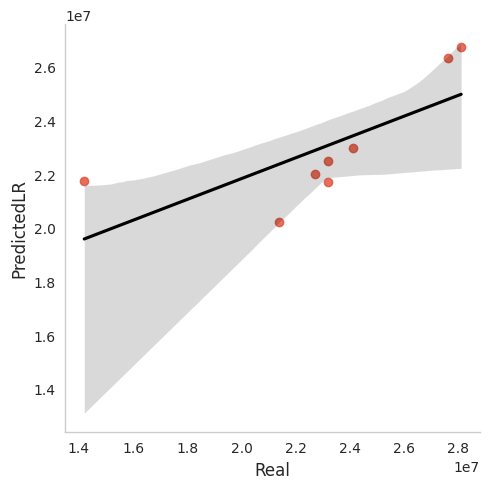

In [187]:
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

In [195]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [196]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : -0.7157416019386764 , Out of Sample Test Score : 0.002082533039260759
Training RMSE : 5453405.615044382 Testing RMSE : 4003921.6003962993
Training MAPE : 24.79555842477364 Testing MAPE : 17.09726566570608


In [197]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [198]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9953846327199792 , Test Score : -1.0115352818168555
Training RMSE : 282842.71247461904 Testing RMSE : 5684628.395946387
Training MAPE : 0.7115103194227179 Testing MAPE : 15.948441651661636


In [199]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9953846327199792 , Test Score : -1.0115352818168555
Training RMSE : 282842.71247461904 Testing RMSE : 5684628.395946387
Training MAPE : 0.7115103194227179 Testing MAPE : 15.948441651661636


In [200]:
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred})

In [201]:
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

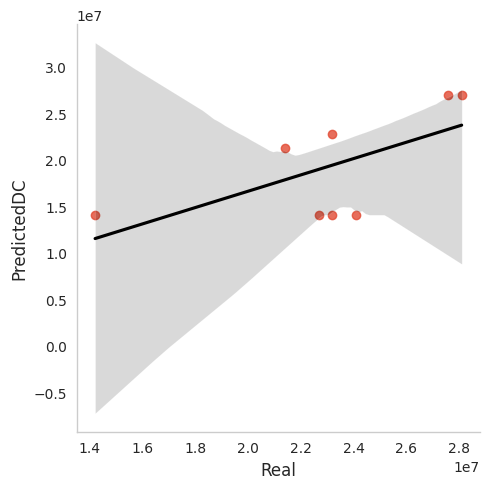

In [202]:
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

In [203]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,
                                        train_score_2,
                                        train_score_3,
                                        train_score_4],
                         'Test_Score':[test_score_1,
                                       test_score_2,
                                       test_score_3,
                                       test_score_4]})

In [204]:
score_df

,Train_Score,Test_Score
0,0.470022,0.484764
1,-0.715742,0.002083
2,0.995385,-1.011535
3,0.995385,-1.011535
